### Импорт необходимых библиотек

- numpy: библиотека для работы с массивами и числовыми вычислениями
- pandas: библиотека для обработки и анализа данных
- matplotlib.pyplot: библиотека для построения графиков
- seaborn: библиотека для визуализации данных на основе matplotlib
- sklearn.model_selection.train_test_split: функция для разделения данных на обучающую и тестовую выборки
- sklearn.preprocessing.StandardScaler: класс для стандартизации данных
- sklearn.svm.SVC: класс для создания модели SVM
- sklearn.metrics: функции для оценки производительности модели
- itertools: библиотека для работы с итераторами

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import itertools

### Загрузка данных

Загрузка данных из CSV файла в DataFrame

In [2]:
df = pd.read_csv('creditcard.csv')

### Предварительный анализ данных

Отображение первых 5 строк данных

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Информация о DataFrame (размер, типы данных, количество ненулевых значений)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Статистическое описание данных (среднее, стандартное отклонение и т.д.)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Распределение классов

Визуализация распределения классов (нормальные и мошеннические транзакции) с помощью countplot

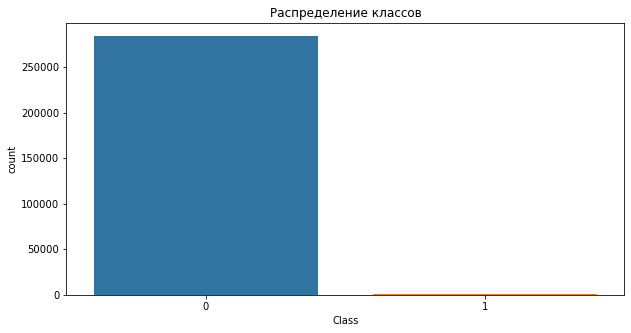

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=df)
plt.title('Распределение классов')
plt.show()

### Распределение транзакций по времени

Построение гистограммы распределения транзакций по времени

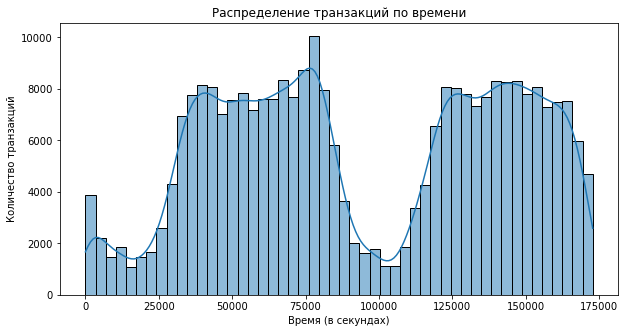

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Распределение транзакций по времени')
plt.xlabel('Время (в секундах)')
plt.ylabel('Количество транзакций')
plt.show()

### Распределение сумм транзакций

Построение гистограммы распределения сумм транзакций с логарифмической шкалой

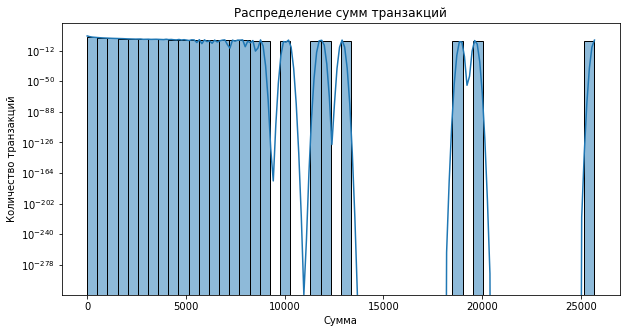

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма')
plt.ylabel('Количество транзакций')
plt.yscale('log')
plt.show()

### Плотность распределения признаков для нормальных и мошеннических транзакций

Построение графиков плотности для каждого признака, чтобы показать различия между нормальными и мошенническими транзакциями

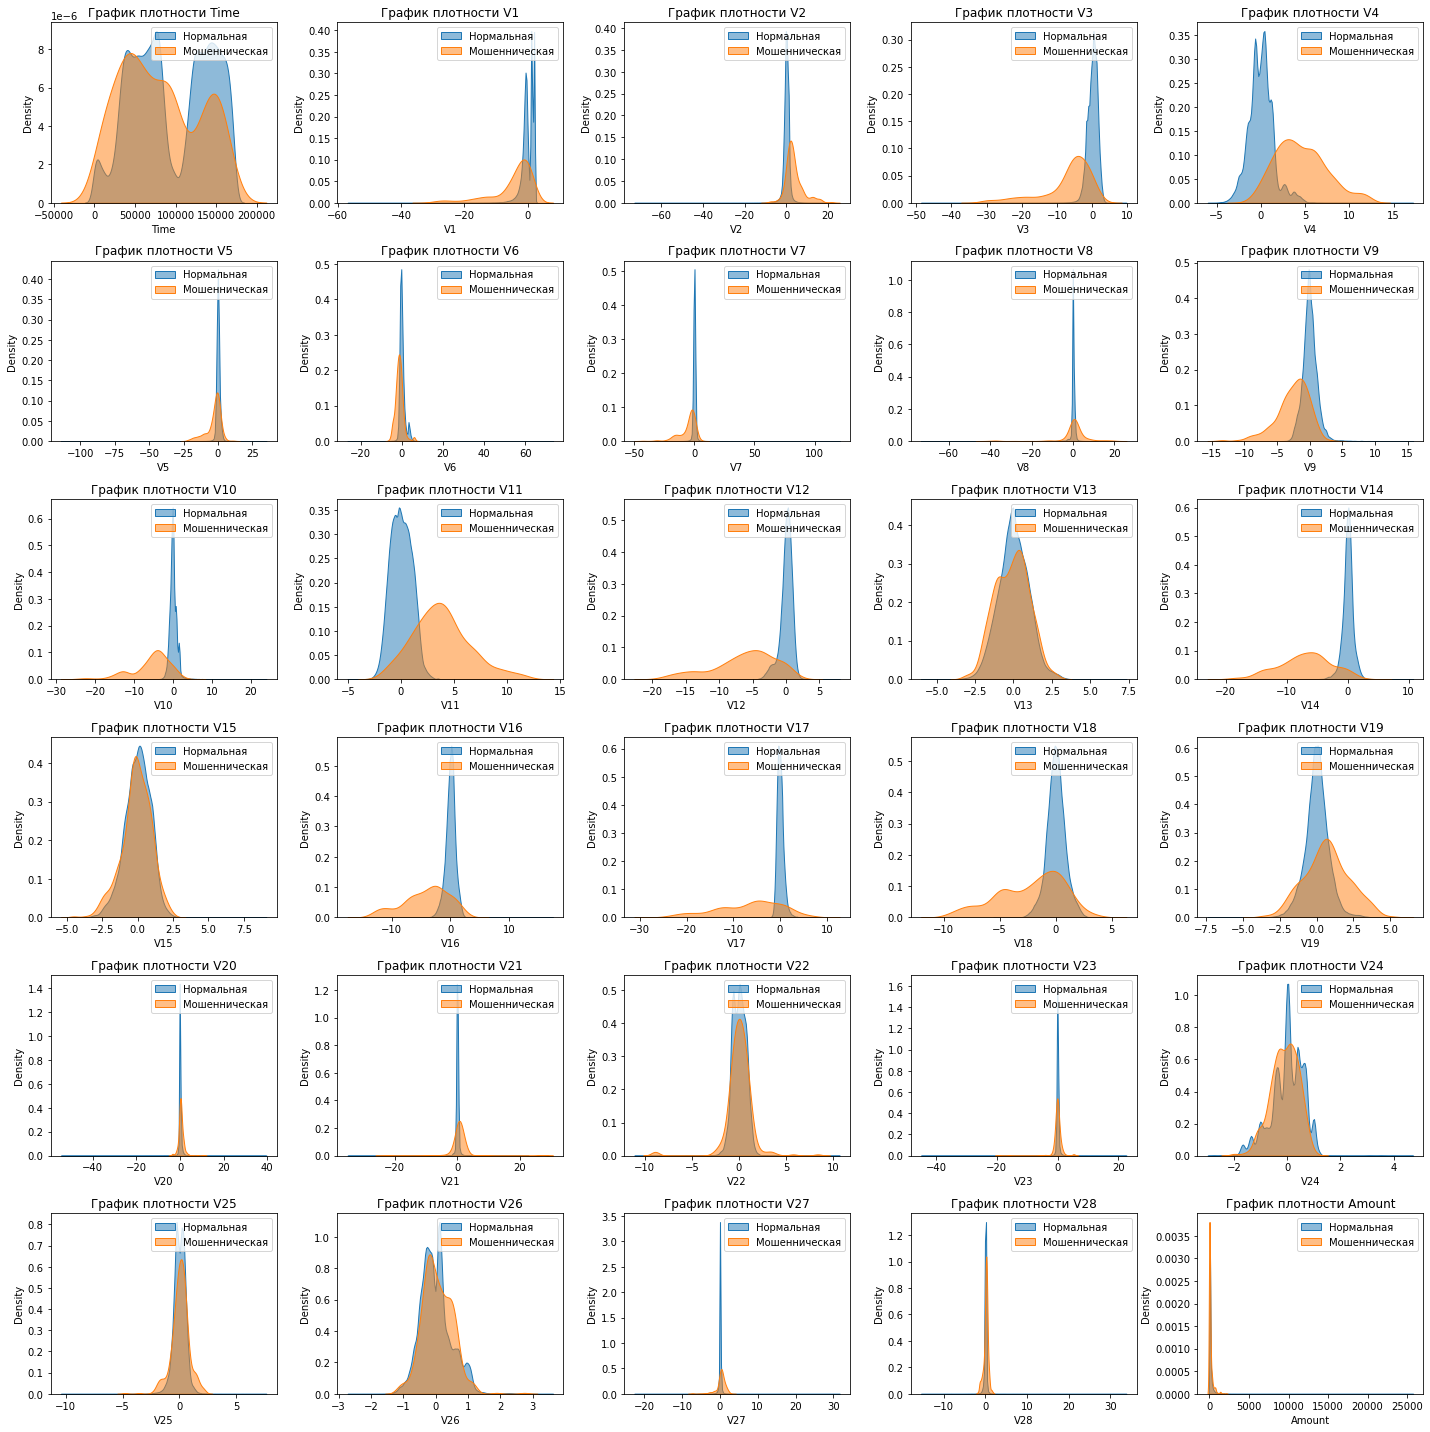

In [9]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
features = df.columns[:-1]

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    sns.kdeplot(normal[feature], label='Нормальная', fill=True, alpha=0.5)
    sns.kdeplot(fraud[feature], label='Мошенническая', fill=True, alpha=0.5)
    plt.title(f'График плотности {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

### Корреляционная матрица

Построение корреляционной матрицы для отображения корреляций между признаками

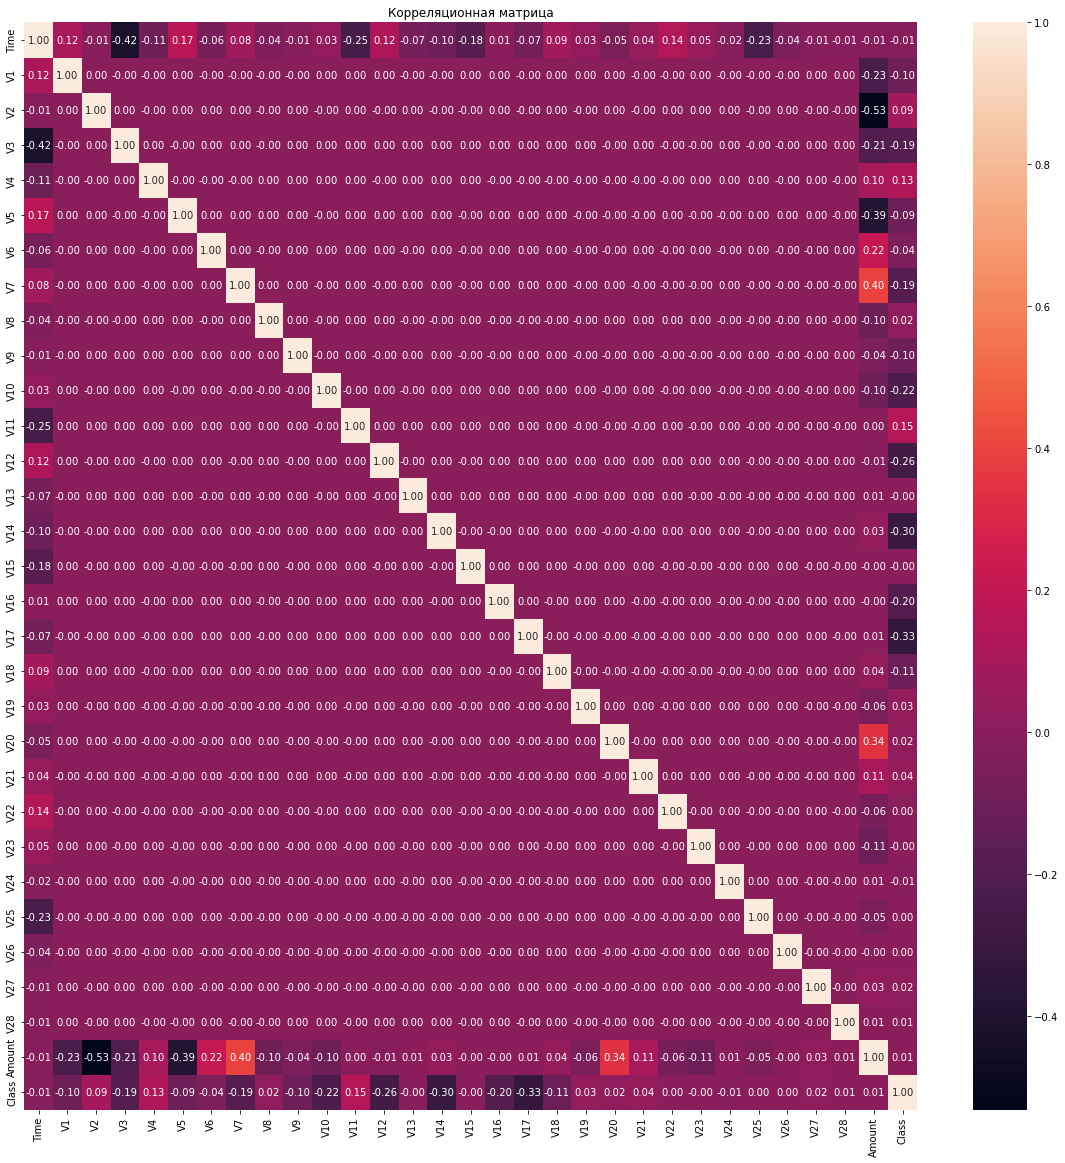

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

### Разделение данных на признаки и метки

- X: признаки (все столбцы кроме 'Class').
- y: метки (столбец 'Class').

In [11]:
X = df.drop(columns=['Class'])
y = df['Class']

### Разделение данных на обучающую и тестовую выборки

Разделение данных на обучающую (80%) и тестовую (20%) выборки с сохранением пропорций классов

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Нормализация данных

StandardScaler: стандартизация данных, чтобы они имели среднее значение 0 и стандартное отклонение 1

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Создание и обучение модели SVM

- SVC: создание модели SVM с радиально-базисной функцией ядра (RBF) и сбалансированными весами классов.
- fit: обучение модели на нормализованных данных.

In [14]:
svm_clf = SVC(kernel='rbf', random_state=42, class_weight='balanced', probability=True)
svm_clf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

### Прогнозирование на тестовых данных

- predict: прогнозирование классов.
- predict_proba: получение вероятностей классов для вычисления метрик.

In [15]:
y_pred = svm_clf.predict(X_test_scaled)
y_prob = svm_clf.predict_proba(X_test_scaled)[:, 1]

### Оценка производительности модели

- classification_report: подробный отчет о точности, полноте и F1-оценке для каждого класса
- confusion_matrix: матрица ошибок (true positives, true negatives, false positives, false negatives)
- precision_score, recall_score, f1_score: метрики точности, полноты и F1-оценки

In [16]:
print('Классификационный отчет:\n', classification_report(y_test, y_pred))
print('Матрица ошибок:\n', confusion_matrix(y_test, y_pred))
print('Точность: ', precision_score(y_test, y_pred))
print('Полнота: ', recall_score(y_test, y_pred))
print('F1-оценка: ', f1_score(y_test, y_pred))

Классификационный отчет:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.76      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.88      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Матрица ошибок:
 [[56708   156]
 [   24    74]]
Точность:  0.3217391304347826
Полнота:  0.7551020408163265
F1-оценка:  0.45121951219512196


### Визуализация матрицы ошибок

Функция для построения и отображения матрицы ошибок

In [17]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица ошибок', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Нормализированная матрица ошибок')
    else:
        print('Матрица ошибок без нормализации')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')

Отображение матрицы ошибок

Матрица ошибок без нормализации


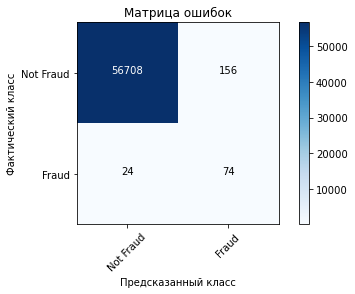

In [18]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'], title='Матрица ошибок')
plt.show()

### ROC-кривая

Построение ROC-кривой для оценки способности модели различать между положительными и отрицательными классами

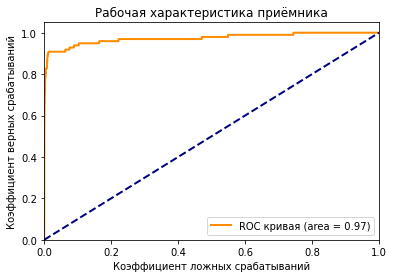

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Коэффициент ложных срабатываний')
plt.ylabel('Коэффициент верных срабатываний')
plt.title('Рабочая характеристика приёмника')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall кривая

Построение Precision-Recall кривой для оценки взаимосвязи между точностью и полнотой

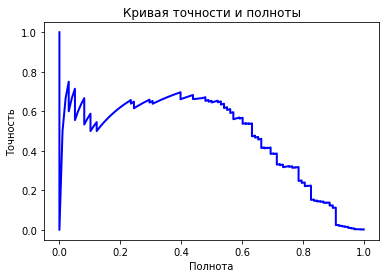

In [20]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая точности и полноты')
plt.show()

### Важность признаков на основе коэффициентов SVM (для линейного ядра)

Создание и обучение модели SVM с линейным ядром для анализа важности признаков

In [21]:
svm_linear = SVC(kernel='linear', class_weight='balanced')
svm_linear.fit(X_train_scaled, y_train)
importance = np.abs(svm_linear.coef_[0])

- Создание DataFrame с важностью признаков
- Сортировка DataFrame по важности признаков в порядке убывания

In [22]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

Визуализация важности признаков с помощью barplot

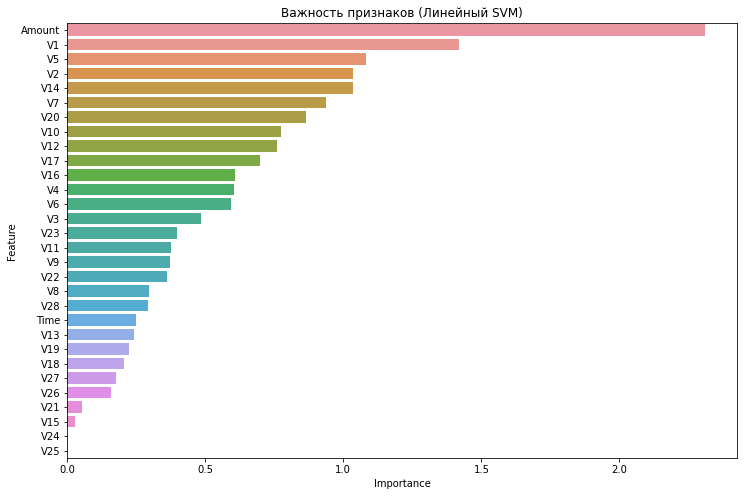

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков (Линейный SVM)')
plt.show()